In [1]:
import pandas as pd
import numpy as np

In [2]:
trivago = pd.read_pickle('../data/minimal_paths/trivago.pickle')
spotify = pd.read_pickle('../data/minimal_paths/spotify.pickle')
microsoft = pd.read_pickle('../data/minimal_paths/microsoft1.pickle')

In [3]:
all_minimal_paths = {
    'Trivago': trivago,
    'Spotify': spotify,
    'Microsoft': microsoft
}

# Topological distances

In [4]:
topological_distances = []
for name, mp in all_minimal_paths.items():
    topological_distances += [mp.shortest.value_counts(normalize=True).rename(name)]
topological_distances = pd.concat(topological_distances, axis=1).sort_index().cumsum()

In [5]:
topological_distances.to_csv(f'../reports/csv/topological_distances.csv', index_label='index', float_format='%g')

<Axes: xlabel='shortest'>

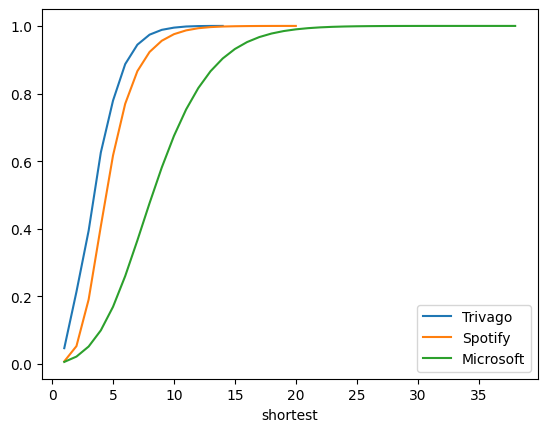

In [6]:
topological_distances.plot()

In [7]:
topological_distances.idxmax()

Trivago      14
Spotify      20
Microsoft    38
dtype: int64

In [8]:
topological_distances[topological_distances<=0.5].idxmax()

Trivago      3
Spotify      4
Microsoft    8
dtype: int64

---

# Temporal distances

In [9]:
temporal_distances = []
for name, mp in all_minimal_paths.items():
    s = (mp.fastest/np.timedelta64(1, 'h')).astype(int).value_counts(normalize=True).rename(name)
    idx_min, idx_max = s.index.min(), s.index.max()+1
    temporal_distances += [s.reindex(range(idx_min, idx_max), fill_value=0)]
temporal_distances = pd.concat(temporal_distances, axis=1).sort_index().cumsum()

In [10]:
temporal_distances.idxmax()

Trivago      604
Spotify      640
Microsoft    659
dtype: int64

<Axes: xlabel='fastest'>

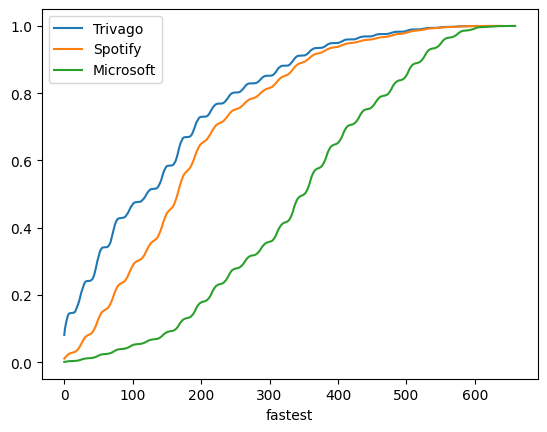

In [11]:
temporal_distances.plot()

In [12]:
temporal_distances.to_csv(f'../reports/csv/temporal_distances.csv', index_label='index', float_format='%g')